<a href="https://colab.research.google.com/github/maxvcbhan/DADS5001-car-production/blob/main/app_revise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
df_original = pd.read_csv('data.csv')
df_original.dtypes

,0
Country,object
Maker/Brand,object
Type,object
Group_Segment,object
Segment,object
2014,int64
2015,int64
2016,int64
2017,int64
2018,int64


In [109]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

## Figure 1

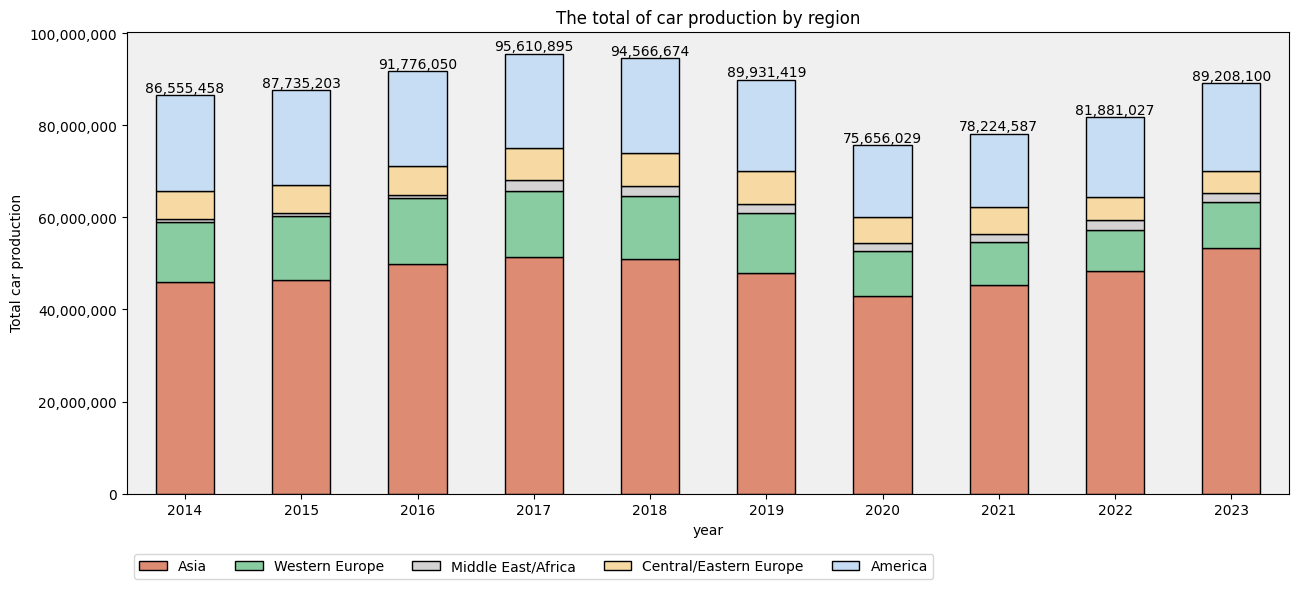

In [110]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)]
plt.style.use('tableau-colorblind10')
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()

for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)

#colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple",]
colors=["#DD8B72","#8ACCA1","#D4D2D3", "#F7DAA3" ,"#C7DDF4",]

# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='The total of car production by region',figsize=(15, 6), color=colors, edgecolor='black')
ax.set_facecolor('#F0F0F0')  # สีพื้นหลังเทาอ่อน


plt.ylabel("Total car production")
plt.xticks(rotation=0)
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
#ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))

ax.legend(loc='lower left', bbox_to_anchor=(0, -0.2), ncol=len(regions))

my_path = os.path.abspath("./figure")

my_file = 'figure1_car_production_by_region.png'

#plt.savefig(os.path.join(my_path, my_file),bbox_inches='tight')


# Figure 2

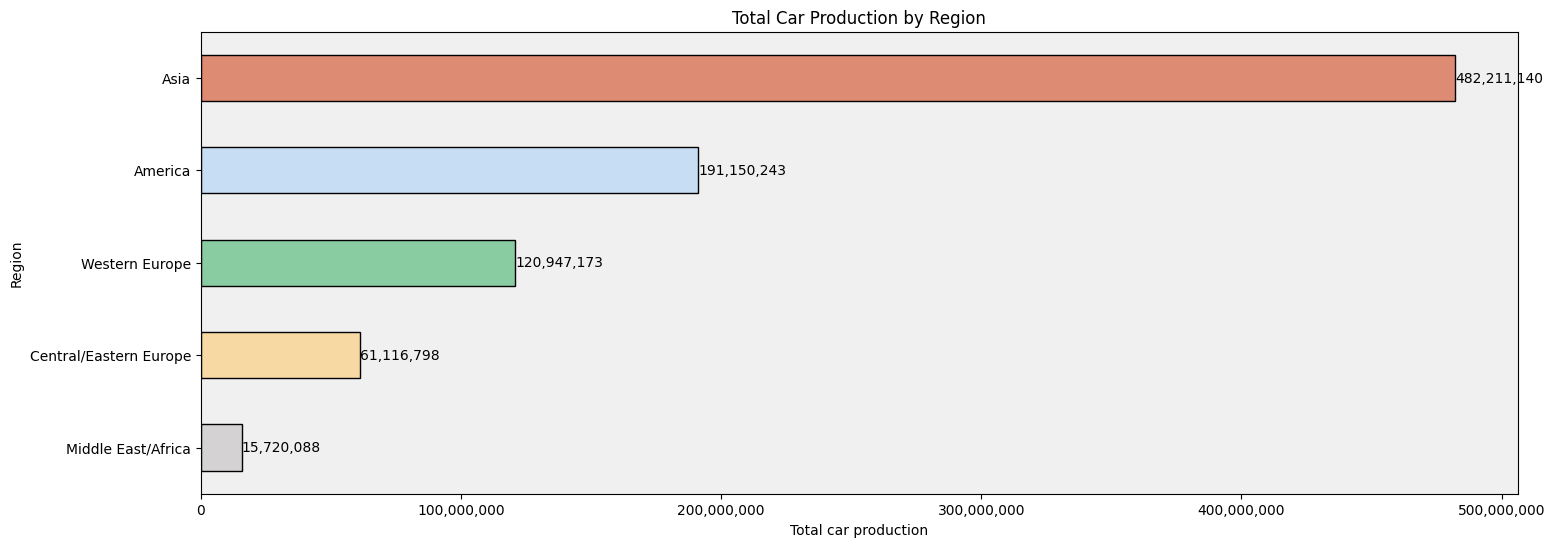

In [111]:
import matplotlib.pyplot as plt
import os

regions = df_original["Region"].unique()

total = df_original.groupby("Region")["Total"].sum().sort_values(ascending=True)

colors=["#D4D2D3", "#F7DAA3", "#8ACCA1","#C7DDF4","#DD8B72"]
ax = total.plot(kind='barh', title='Total Car Production by Region', figsize=(17, 6),color=colors, edgecolor='black')
ax.set_facecolor('#F0F0F0')  # สีพื้นหลังเทาอ่อน

plt.xlabel("Total car production")
plt.ylabel("Region")

for container in ax.containers[:]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

my_path = os.path.abspath("./figure")
my_file = 'figure2_car_production_by_zone.png'
#plt.savefig(os.path.join(my_path, my_file))


# Figure 3

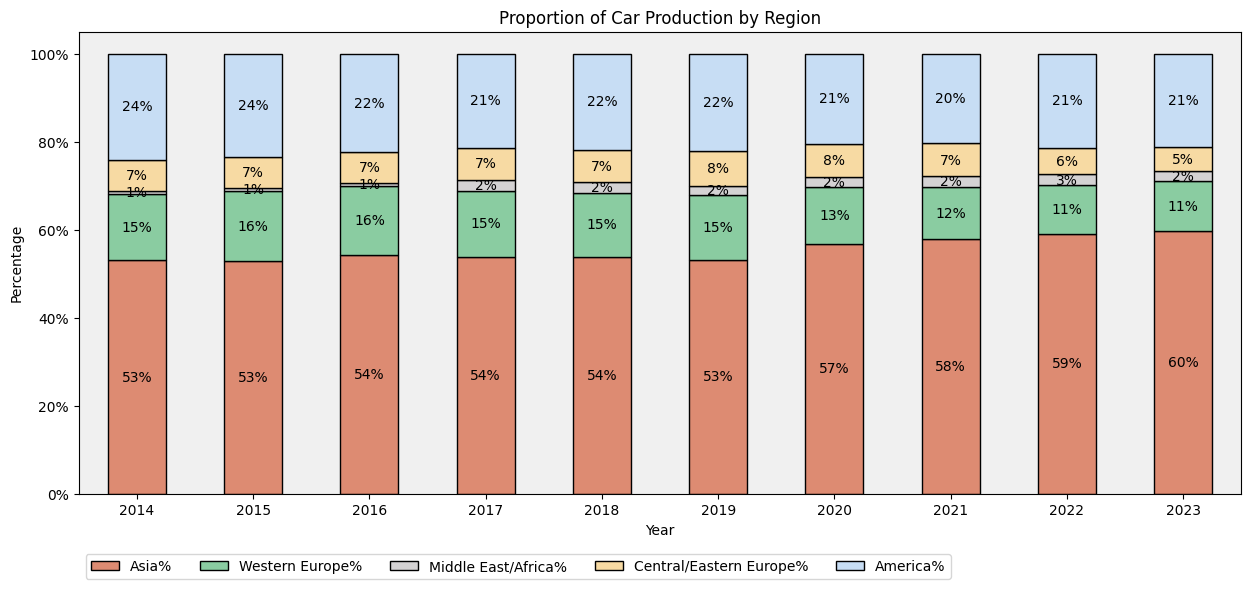

In [112]:
import matplotlib.pyplot as plt
import os

import numpy as np

years = [i for i in range(2014,2024)]
transformed_data = {
    "year": years,
}

regions = df_original["Region"].unique()

new_data = {

}
percentage_column_name = []
# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    new_data[str(region)+"%"]=[]
    percentage_column_name.append(str(region)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year')
df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)
for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100
colors=["#DD8B72","#8ACCA1","#D4D2D3", "#F7DAA3" ,"#C7DDF4",]
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6), edgecolor='black')
ax.set_facecolor('#F0F0F0')  # สีพื้นหลังเทาอ่อน

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
#ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.2), ncol=len(regions))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.title("Proportion of Car Production by Region")

my_path = os.path.abspath("./figure")
my_file = 'figure3_car_production_by_zone_percentage.png'
#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

# print(selected_df)

# Figure 4

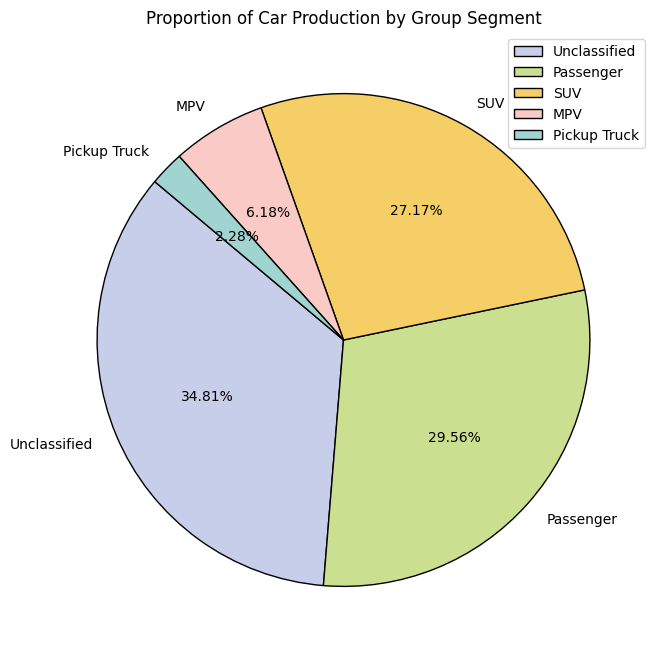

In [ ]:
import matplotlib.pyplot as plt


data  = df_original["Group_Segment"].value_counts()
labels = data.index.tolist()
sizes = data.values.tolist()

fig, ax = plt.subplots(figsize=(8, 8))
colors=["#C7CEEA","#CBDF91","#F5CF65", "#FACBC6" ,"#A0D4D0",]
# ax.pie(data["Group_Segment"], labels=labels, autopct='%1.1f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors,wedgeprops={"edgecolor": "black"})
plt.title("Proportion of Car Production by Group Segment")
plt.legend(labels, loc="upper right")


my_path = os.path.abspath("./figure")
my_file = 'figure4_share_car_production_by_segment_2014-2023.png'
#plt.savefig(os.path.join(my_path, my_file))

# Back up

In [ ]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

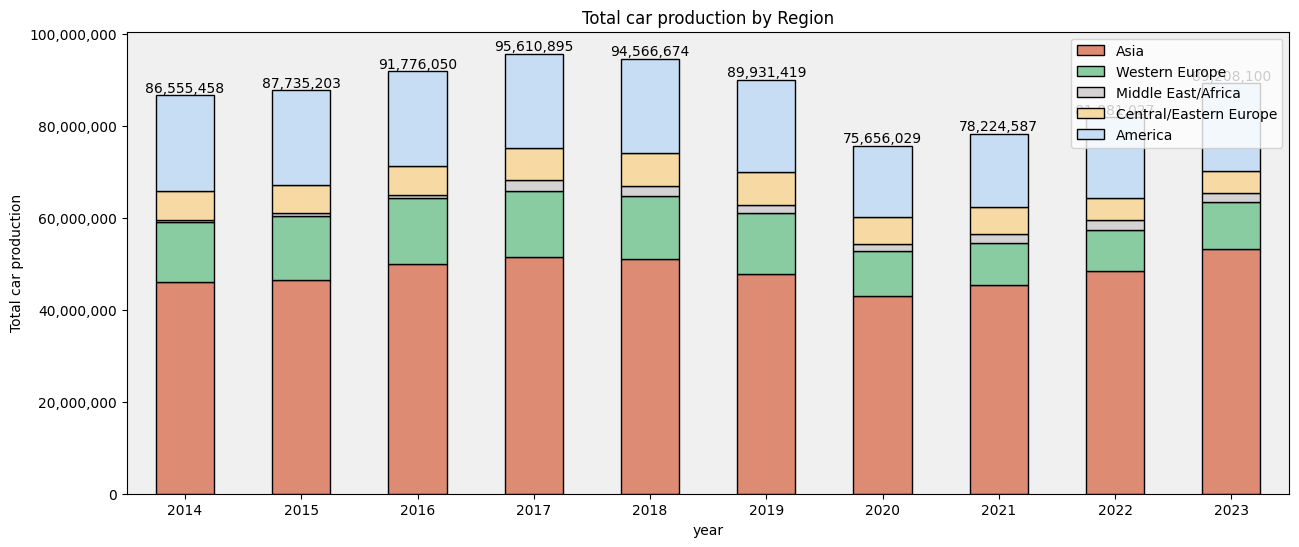

In [ ]:
import matplotlib.pyplot as plt
years = [i for i in range(2014,2024)]

# Create an empty dictionary to store the results
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()
percentage_column_name = []

# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)
colors=["#DD8B72","#8ACCA1","#D4D2D3", "#F7DAA3" ,"#C7DDF4",]
# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='Total car production by Region',figsize=(15, 6), color=colors, edgecolor='black')
ax.set_facecolor('#F0F0F0')  # สีพื้นหลังเทาอ่อน)

plt.ylabel("Total car production")
plt.xticks(rotation=0)
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


## Figure 5

In [113]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)]
plt.style.use('tableau-colorblind10')

percentage_column_name= []
# print(df_original)
transformed_data = {
    "year": years,
}
group_segments = df_original["Group_Segment"].unique()

for group_segment in group_segments:
    transformed_data[str(group_segment)]=[]
    percentage_column_name.append(str(group_segment)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Group_Segment"] == group_segment)][str(year)].sum()
        transformed_data[str(group_segment)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
# percentage_column_name.append('year')
# percentage_column_name.append('Total')
# print(df_transformed)

df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)



for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100


selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]
print(selected_df)
colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple"]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6))
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.title("Share Car Production by Segment 2014-2023")

my_path = os.path.abspath("./figure")
my_file = 'figure_5_share_car_production_by_segment_2014-2023.png'
#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

   Passenger%       SUV%      MPV%  Unclassified%  Pickup Truck%
0   52.085501  21.456155  7.053304      14.197156       5.207884
1   49.317495  25.087756  6.784985      13.624522       5.185242
2   45.910704  28.880291  6.469057      13.450272       5.289676
3   44.675599  30.912474  5.981917      12.809226       5.620784
4   42.217920  32.565210  5.385091      14.004528       5.827252
5   39.906365  34.331020  5.065369      14.557030       6.140217
6   37.701815  36.333919  4.095709      16.101224       5.767333
7   35.470086  38.025307  4.102833      15.974013       6.427762
8   35.644999  40.704270  3.988443      13.074602       6.587687
9   33.702329  43.192014  4.214015      12.793280       6.098362


KeyError: 'year'

# Figure 6

   year  Passenger A%  Passenger B%  Passenger C%  Passenger D%  Passenger E%  \
0  2014      6.695216     11.630987     21.241473      9.769044      2.748781   
1  2015      6.169371     10.615887     20.464215      9.671754      2.396267   
2  2016      5.402346      9.503636     19.784559      8.904760      2.315403   
3  2017      5.772665     10.508166     17.642605      8.470727      2.281435   
4  2018      5.451748     10.334805     15.505328      8.631550      2.294489   
5  2019      5.074291      9.620033     14.258445      8.713314      2.240282   
6  2020      4.569378      8.766457     13.133101      8.944497      2.288382   
7  2021      5.094600      8.151313     11.288552      8.432248      2.503373   
8  2022      5.306665      7.912906     10.278710      9.488732      2.657986   
9  2023      4.550792      7.167023      9.706166      9.670888      2.607461   

     SUV-B%     SUV-C%     SUV-D%    SUV-E%      MPV%  Unclassified%  \
0  1.979331   8.585732   8.037403  2

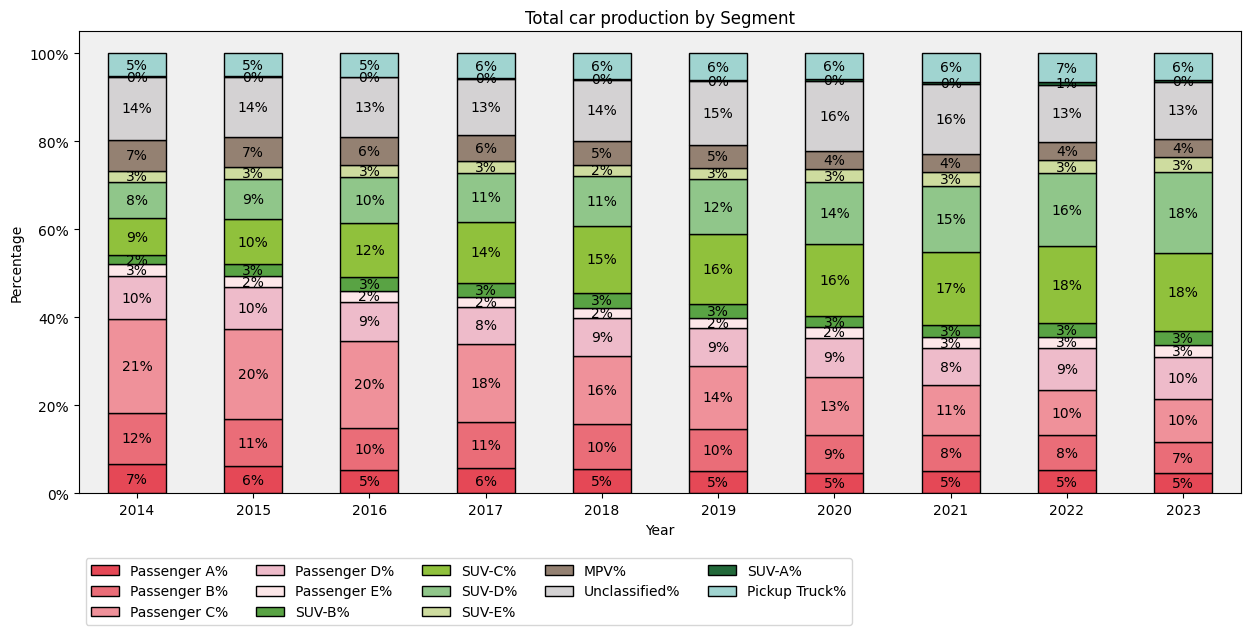

In [114]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)]
plt.style.use('tableau-colorblind10')

percentage_column_name = []
# print(df_original["Segment"].unique())
transformed_data = {
    "year": years,
}
group_segments = df_original["Segment"].unique()

for group_segment in group_segments:
    transformed_data[str(group_segment)]=[]
    percentage_column_name.append(str(group_segment)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Segment"] == group_segment)][str(year)].sum()
        transformed_data[str(group_segment)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year')
percentage_column_name.append('Total')


df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)
# print(df_transformed)
# print(df_transformed.columns)
for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 14] ) * 100

percentage_column_name.remove('Total')
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]
print(selected_df)
#colors=["#E54856","#EA6D78","#EF919A","#EEBBCA","#FDE7E9","#948172","#D4D2D3","#90C68A","#545454"]
colors=["#E54856","#EA6D78","#EF919A","#EEBBCA","#FDE7E9","#59A344","#90C13C","#90C68A","#CEDC9F","#948172","#D4D2D3","#22693A","#A0D4D0"]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6), edgecolor='black')
ax.set_facecolor('#F0F0F0')  # สีพื้นหลังเทาอ่อน))

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
#ax.legend(loc='lower left', bbox_to_anchor=(0, -0.8))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=len(regions))

plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.title("Total car production by Segment")

my_path = os.path.abspath("./figure")
my_file = 'figure_6_share_car_production_by_segment_2014-2023.png'
#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

# Figure 7

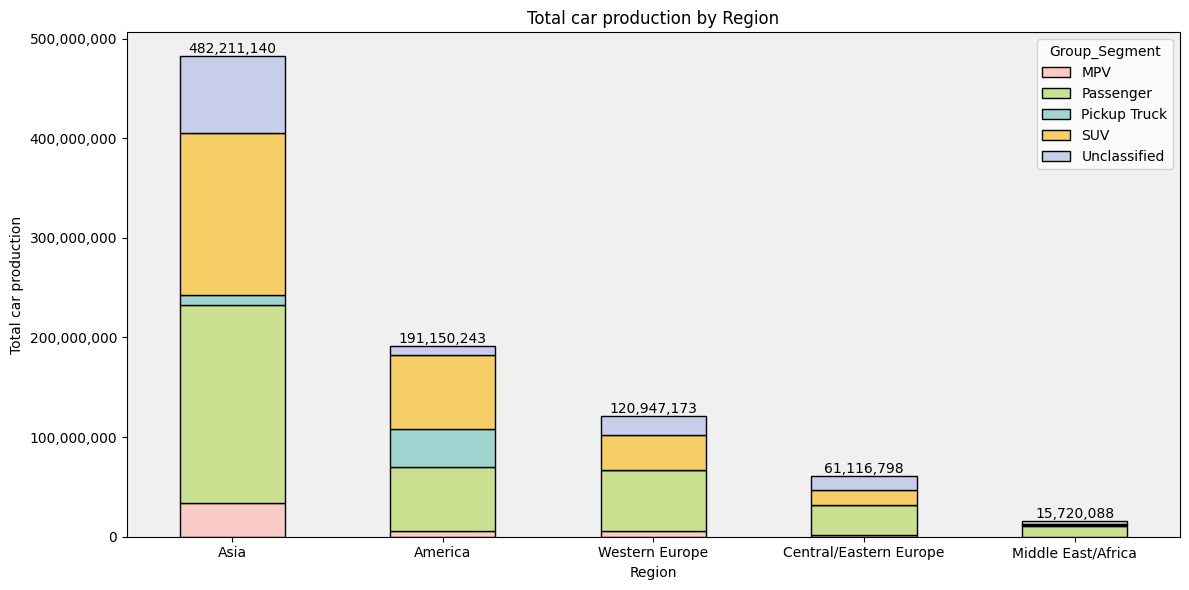

In [115]:
import matplotlib.pyplot as plt
import os


grouped_data = df_original.groupby(['Region', 'Group_Segment'])['Total'].sum().unstack(fill_value=0)
region_totals = df_original.groupby('Region')['Total'].sum()

sorted_regions = region_totals.sort_values(ascending=False).index

grouped_data_sorted = grouped_data.loc[sorted_regions]
colors=["#FACBC6", "#CBDF91", "#A0D4D0","#F5CF65","#C7CEEA"]
ax = grouped_data_sorted.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors, edgecolor='black')
ax.set_facecolor('#F0F0F0')  # สีพื้นหลังเทาอ่อน



for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xticks(rotation=0)
plt.title("Total car production by Region")
plt.ylabel("Total car production")
plt.tight_layout()
my_path = os.path.abspath("./figure")
my_file = 'figure_7_share_car_production_by_zone.png'
#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')
